<a href="https://colab.research.google.com/github/gugi200/final_project/blob/main/project_y4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qU
!wandb login 3014974e724f01c4d63f956fa13fd7f0463e16d4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 6.3 MB/s eta 0:00:00


In [3]:
#
#   Michael Gugala
#   02/12/2023
#   Image recognition
#   Master 4th year project
#   Univeristy of Bristol
#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn

import torchvision
from torchvision import datasets#
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
from PIL import Image

from pathlib import Path

import cv2
from timeit import default_timer as timer
from tqdm.auto import tqdm

# check imports
print(torch.__version__)
print(torchvision.__version__)

#agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.1.0+cu118
0.16.0+cu118


'cuda'

In [4]:
# downloiad test data
from torchvision.datasets import FashionMNIST
from torchvision import transforms

train_data = FashionMNIST(
    root='~/.pytorch/F_MNIST_data',
    download=True,
    train=True,
    target_transform=None)

test_data = FashionMNIST(
    root='~/.pytorch/F_MNIST_data',
    download=True,
    train=False,
    target_transform=None)

class_names = [x.replace('/', '_').replace('-', '') for x in train_data.classes]

transform = transforms.ToPILImage()



from pathlib import Path

data_path = Path("data/")
image_path1 = data_path / "FashionMNIST" / "train"

if image_path1.is_dir():
    print('directory already exists')
else:
    print('creating folder')
    for class_name in class_names:
        image_class_path = image_path1 / class_name
        image_class_path.mkdir(parents=True, exist_ok=True)

    for idx, (train_img, target) in enumerate(zip(train_data.data[:1000], train_data.targets[:1000])):
        train_data_PIL = transform(train_img)
        file = "data_" + str(idx) + '.jpg'
        # print(target)
        # print(data_path / "FashionMNIST"/"train" / class_names[target] /file)
        train_data_PIL.save(data_path / "FashionMNIST"/"train" / class_names[target] /file)


data_path = Path("data/")
image_path2 = data_path / "FashionMNIST" / "test"
if image_path2.is_dir():
    print('directory already exists')
else:
    print('creating folder')
    for class_name in class_names:
        image_class_path = image_path2 / class_name
        image_class_path.mkdir(parents=True, exist_ok=True)
        image_class_path.mkdir(parents=True, exist_ok=True)

    for idx, (test_img, target) in enumerate(zip(test_data.data[:250], test_data.targets[:250])):
        test_data_PIL = transform(test_img)
        file = "data_" + str(idx) + '.jpg'
        test_data_PIL.save(data_path / "FashionMNIST"/"test" / class_names[target] /file)





100%|██████████| 26421880/26421880 [00:01<00:00, 16672292.78it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273069.32it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5069114.10it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20524978.13it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw

creating folder
creating folder


# Plan of action
A.
1. Create different CNN models
    * a few of my own making
    * restnet
    * maybe something else
2. Train them on MNIST fashion data scaled to 24x24
3. a Loop to find the best hyperparameters

B. Create SVM models in scikit learn
1. Create a pipeline with different hyper parameters


# Prepare data
* trasnform to tensors
* upscale to 256 (restnet size)
* normalize (apply different normalization)

In [ ]:
preprocess = transforms.Compose([

    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.25, 0.25, 0.25], std=[0.1, 0.1, 0.1]),
])

train_data = datasets.ImageFolder(root=Path("data/FashionMNIST/train"),
                                 transform=preprocess, # tranform for the data
                                  target_transform=None) # transform for label


test_data = datasets.ImageFolder(root=Path("data/FashionMNIST/test"),
                                 transform=preprocess, # tranform for the data
                                  target_transform=None) # transform for label
class_names = train_data.classes

torch.Size([32, 3, 224, 224]) torch.Size([32])


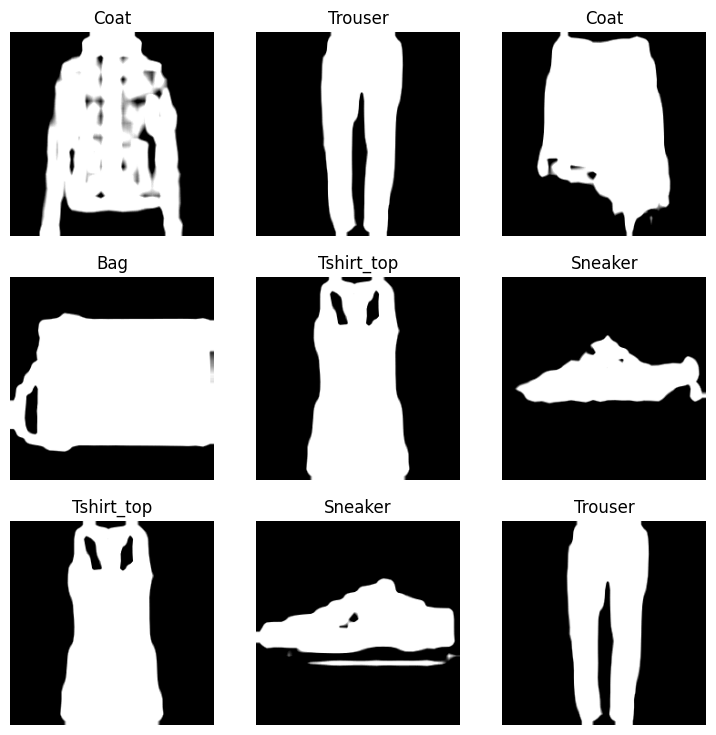

In [ ]:
# split data into batches
from torch.utils.data import DataLoader
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) #  shuffling to remove order

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False) # here it doesn't matter, no point to waste resources


# iter tranforms it into iterable, next accesses the next batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape, train_labels_batch.shape)

# display random datapoints
fig = plt.figure(figsize=(9, 9))
rows, cols  = 3, 3
for pic in range(1, 1+rows*cols):
    rand_int = np.random.randint(0, BATCH_SIZE)
    img = train_features_batch[rand_int]
    img_RGB = img.permute([1, 2, 0]).numpy()
    fig.add_subplot(rows, cols, pic)
    plt.imshow(img_RGB.squeeze())
    plt.axis(False)
    plt.title(class_names[train_labels_batch[rand_int]])





# Create models



## RestNet

In [5]:
import torch
restnet18_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
restnet18_model

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Create training loop

create dataset

In [6]:
from pickle import NONE
# create data set from a custom data
def create_dataset(path, batchsize, mean=None, std=None):
    '''
    input:
    path - path to the folder with the data
           eg for train - "data/FashionMNIST/train"
    batchsize - eg 32
    mean (optional)- for normalization eg. [0.25, 0.25, 0.25]
    std (optional)- for nortmalization eg [0.1, 0.1, 0.1]

    returns:
    dataloader with image size of 224
    class_names
    '''
    if mean:
        preprocess = transforms.Compose([

            transforms.Resize(size=(224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std),
        ])
    else:
        preprocess = transforms.Compose([

            transforms.Resize(size=(224, 224)),
            transforms.ToTensor()
        ])


    data = datasets.ImageFolder(root=Path(path),
                                    transform=preprocess, # tranform for the data
                                    target_transform=None) # transform for label
    dataloader = DataLoader(dataset=data,
                                batch_size=batchsize,
                                shuffle=True) #  shuffling to remove order
    class_names = data.classes
    return dataloader, class_names

# visdualize 9 random images in a batch
def visualise_data(dataloader, class_names):
    '''
    input dataloader
    class names

    displays 9 random images in a batch and their labels
    '''
    train_features_batch, train_labels_batch = next(iter(dataloader))
    # display random datapoints
    fig = plt.figure(figsize=(9, 9))
    rows, cols  = 3, 3
    for pic in range(1, 1+rows*cols):
        rand_int = np.random.randint(0, BATCH_SIZE)
        img = train_features_batch[rand_int]
        img_RGB = img.permute([1, 2, 0]).numpy()
        fig.add_subplot(rows, cols, pic)
        plt.imshow(img_RGB.squeeze())
        plt.axis(False)
        plt.title(class_names[train_labels_batch[rand_int]])


# create optimizer
def create_optiimizer(model, optimizer, lr):
    '''
    inputs:
    model - CNN network
    optimizer - "adam" or "sgd"
    lr - learning rate eg. 0.01

    '''
    if optimizer=='adam':
        optimizer = torch.optim.Adam(model.parameters(),
                                     lr=lr
                                     )
    elif optimizer=='sgd':
        optimizer = torch.optim.SGD(model.parameters(),
                                     lr=lr,
                                    momentum=0.9
                                     )

    return optimizer


def get_lossFn():
    '''
        returns CrossEntropyLoss function
    '''

    return nn.CrossEntropyLoss()

# create train step
def train_step(model, metric, loss_fn, optimizer,
               data_loader, device, debug=False):
    '''
    model - CNN network
    metric - metric to calculate accuracy
    loss_fn - loss function
    optimizer - optimizer to be applied
    data_loader - dataloader
    device - decide for the model to train
    debug (optional)- if True prints average loss and metric of the batch

    returns
    train_loss - average loss of the batch
    train_acc - average metric score of the batch

    The function saves the metric score and loss of each iteration in WandB

    '''
    train_loss, train_acc = 0, 0

    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # put data on the device
        X, y = X.to(device), y.to(device)

        #forward pass, return raw logits
        y_pred = model(X)

        #loss
        loss = loss_fn(y_pred, y)
        #accuracy
        acc = metric(y, torch.argmax(y_pred, dim=1))

        train_loss += loss # accumulate train loss
        train_acc += acc # accumulate train accuracy

        # zero grad
        optimizer.zero_grad()

        # loss bacward
        loss.backward()

        #optimizer step
        optimizer.step()

        # log in wandb
        wandb.log({"loss": loss,
                   'accuracy': acc})

    # device total loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    if debug:
        print(f'Train loss: {train_loss}, Train acc: {train_acc*100:0.4f}%')

    return train_loss, train_acc


# create test step
def test_step(model, metric, loss_fn, data_loader, device, debug=False):
    '''
    model - CNN network
    metric - metric to calculate accuracy
    loss_fn - loss function
    data_loader - dataloader
    device - decide for the model to train
    debug (optional)- if True prints average loss and metric of the batch

    returns
    test_loss - average loss of the batch
    test_acc - average metric score of the batch

    The function saves the metric score and loss of each iteration in WandB

    '''
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            #1 forward pass
            test_pred = model(X_test)

            # calculate loss
            loss = loss_fn(test_pred, y_test)
            test_loss += loss

            #accuracy
            acc = metric(y_test, test_pred.argmax(dim=1))
            test_acc += acc

            wandb.log({"test loss": loss,
                       'test accuracy': acc})

        # Calculate the test loss average batch
        test_loss /= len(data_loader)

        # acc per bactch
        test_acc /= len(data_loader)

        # Print out what's happening
        if debug:
            print(f'Test loss: {test_loss:.4f}  |  Test acc: {test_acc*100:.4f}%')

        return test_loss, test_acc

# create evaluation loop
def eval_model(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn,
               device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            #accumulate the loss and acc
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # ave loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works if a model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc.item()*100}

optimizer

metric function, optimizer, loss function

## First test loop
test on FashionMNIST with a loop of different hyper parammeters and wandb experiment result collection

In [7]:
import wandb
import torchmetrics

torch.manual_seed(42)
torch.cuda.manual_seed(42)


sweep_config = {
    'method': 'random'
    }
metric = {
    'name': 'loss',
    'goal': 'minimize'
    }
sweep_config['metric'] = metric

parameters_dict = {
    'optimizer': {
        'values': ['adam', 'sgd']
        }
    }

sweep_config['parameters'] = parameters_dict

parameters_dict.update({
    'epochs': {
        'value': 10}
    })

parameters_dict.update({
    'learning_rate': {
        # a flat distribution between 0 and 0.1
        'distribution': 'uniform',
        'min': 0,
        'max': 0.1
      },
    'batch_size': {
        # integers between 32 and 256
        # with evenly-distributed logarithms
        'distribution': 'q_log_uniform_values',
        'q': 8,
        'min': 8,
        'max': 32,
      }
    })

import pprint
pprint.pprint(sweep_config)


sweep_id = wandb.sweep(sweep_config, project="test-wandb-sweep")



def train_model(config=None):
    with wandb.init(config=config):
        config = wandb.config

        train_dataloader, class_names = create_dataset(
                                            path="data/FashionMNIST/train",
                                            batchsize=config.batch_size
                                            )
        test_dataloader, _ = create_dataset(
                                    path="data/FashionMNIST/test",
                                    batchsize=config.batch_size
                                    )
        model = restnet18_model.to(device)
        loss_fn = get_lossFn()
        optimizer = create_optiimizer(model=model,
                                      optimizer=config.optimizer,
                                      lr=config.learning_rate
        )
        metric = torchmetrics.classification.Accuracy(
            task="multiclass",
            num_classes=len(class_names)
        ).to(device)
        train_time_start = timer()
        for epoch in range(config.epochs):
            ave_batch_loss, ave_batch_metric = train_step(
                model=model,
                metric=metric,
                loss_fn=loss_fn,
                optimizer=optimizer,
                data_loader=train_dataloader,
                device=device,
                debug=True
            )
            ve_batch_loss, ave_batch_metric = test_step(
                model=model,
                metric=metric,
                loss_fn=loss_fn,
                data_loader=test_dataloader,
                device=device,
                debug=True
            )
            wandb.log({"average train batch loss": ave_batch_loss,
                       "average train batch metric": ave_batch_metric,
                       "average test batch loss": ave_batch_loss,
                       "average test batch metric": ave_batch_metric,
                       "epoch": epoch
                       })
        train_time_end = timer()
        wandb.log({"train time": train_time_end - train_time_start})

    return model


wandb.agent(sweep_id, train_model, count=5)




{'method': 'random',
 'metric': {'goal': 'minimize', 'name': 'loss'},
 'parameters': {'batch_size': {'distribution': 'q_log_uniform_values',
                               'max': 32,
                               'min': 8,
                               'q': 8},
                'epochs': {'value': 10},
                'learning_rate': {'distribution': 'uniform',
                                  'max': 0.1,
                                  'min': 0},
                'optimizer': {'values': ['adam', 'sgd']}}}
Create sweep with ID: nj6s323g
Sweep URL: https://wandb.ai/gugi200/test-wandb-sweep/sweeps/nj6s323g


wandb: Agent Starting Run: 5p3il61y with config:
wandb: 	batch_size: 16
wandb: 	epochs: 10
wandb: 	learning_rate: 0.09132701486992258
wandb: 	optimizer: sgd
wandb: Currently logged in as: ad20781 (gugi200). Use `wandb login --relogin` to force relogin


Traceback (most recent call last):
  File "<ipython-input-7-0a95c8aeb3df>", line 79, in train_model
    ave_batch_loss, ave_batch_metric = train_step(
  File "<ipython-input-6-58a79fe044e3>", line 123, in train_step
    acc = metric(y, torch.argmax(y_pred, dim=1))
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1518, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1527, in _call_impl
    return forward_call(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchmetrics/metric.py", line 298, in forward
    self._forward_cache = self._forward_reduce_state_update(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchmetrics/metric.py", line 367, in _forward_reduce_state_update
    self.update(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torchmetrics/metric.py", line 470, in wrapped_func
    raise err
  File

Run 5p3il61y errored: RuntimeError('Detected more unique values in `target` than `num_classes`. Expected only 10 but found 16 in `target`.')
wandb: ERROR Run 5p3il61y errored: RuntimeError('Detected more unique values in `target` than `num_classes`. Expected only 10 but found 16 in `target`.')
wandb: Agent Starting Run: 4e83m997 with config:
wandb: 	batch_size: 8
wandb: 	epochs: 10
wandb: 	learning_rate: 0.02799561820701151
wandb: 	optimizer: adam


Train loss: 3.483701467514038, Train acc: 20.4000%
Test loss: 2.1970  |  Test acc: 44.5312%
Train loss: 1.4973076581954956, Train acc: 40.7000%
Test loss: 1.9966  |  Test acc: 29.2969%
Train loss: 1.2448763847351074, Train acc: 52.0000%
Test loss: 1.7426  |  Test acc: 31.6406%
Train loss: 1.132880687713623, Train acc: 58.1000%
Test loss: 2.2165  |  Test acc: 19.1406%
Train loss: 1.0182936191558838, Train acc: 63.5000%
Test loss: 0.8665  |  Test acc: 72.2656%
Train loss: 0.8834972977638245, Train acc: 69.2000%
Test loss: 1.0499  |  Test acc: 63.6719%
Train loss: 0.8796041011810303, Train acc: 68.1000%
Test loss: 0.7003  |  Test acc: 73.8281%
Train loss: 0.7763322591781616, Train acc: 72.0000%
Test loss: 0.8856  |  Test acc: 64.8438%
Train loss: 0.7498733997344971, Train acc: 72.6000%
Test loss: 0.6780  |  Test acc: 77.3438%
Train loss: 0.6542317867279053, Train acc: 75.9000%
Test loss: 1.0148  |  Test acc: 67.5781%


accuracy,▁▁▃▁▁▂▃▂▂▅▅▅▅▄▂▃▅▇▇▃▇▅▅▄▅▆▂▃▅▆▆▄▆▅█▆▄▆▇▄
average test batch loss,█▃▂▂▂▂▂▁▁▁
average test batch metric,▄▂▃▁▇▆█▆█▇
average train batch loss,█▃▂▂▂▂▂▁▁▁
average train batch metric,▄▂▃▁▇▆█▆█▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▄▃▂▂▃▃▂▂▂▂▂▂▂▂▁▁▂▁▂▂▂▂▁▃▂▂▁▁▂▁▁▁▁▂▁▁▂
test accuracy,▆▃▅▃▃▁▄▃▂▄▅▃▃▁▄▃██▇██▆▇▅▆▇▅▆▆▅▆▅▇▇██▇▇▇▅
test loss,▂█▃▃▅▄▃▃▄▃▃▃▃▃▃▄▂▂▂▂▁▂▂▂▂▁▃▂▂▂▁▂▁▂▁▁▂▁▂▃
train time,▁
accuracy,0.75


wandb: Agent Starting Run: ooatqioc with config:
wandb: 	batch_size: 8
wandb: 	epochs: 10
wandb: 	learning_rate: 0.09372094306962296
wandb: 	optimizer: adam


Train loss: 1.3963255882263184, Train acc: 52.9000%
Test loss: 1.2870  |  Test acc: 54.2969%
Train loss: 1.001254677772522, Train acc: 65.4000%
Test loss: 1.1479  |  Test acc: 51.5625%
Train loss: 0.9579986929893494, Train acc: 65.2000%
Test loss: 1.5766  |  Test acc: 65.6250%
Train loss: 0.7915781140327454, Train acc: 69.4000%
Test loss: 0.9266  |  Test acc: 66.0156%
Train loss: 0.763116717338562, Train acc: 73.7000%
Test loss: 0.9922  |  Test acc: 64.8438%
Train loss: 0.7809710502624512, Train acc: 72.9000%
Test loss: 0.6763  |  Test acc: 68.7500%
Train loss: 0.7237460017204285, Train acc: 73.6000%
Test loss: 0.7810  |  Test acc: 74.6094%
Train loss: 0.6156534552574158, Train acc: 77.8000%
Test loss: 0.7760  |  Test acc: 74.2188%
Train loss: 0.6199691891670227, Train acc: 77.0000%
Test loss: 0.7663  |  Test acc: 74.6094%
Train loss: 0.5744861960411072, Train acc: 78.0000%
Test loss: 0.8385  |  Test acc: 71.4844%


accuracy,▂▂▁▃▆▆▅▅▃▂▇▆▆▅▆▇▇█▅▅▇▇▆▆▅▆▅█▅▆▅▃▅▇▇▆▆▆▇▆
average test batch loss,█▅▄▃▃▃▂▁▁▁
average test batch metric,▂▁▅▅▅▆███▇
average train batch loss,█▅▄▃▃▃▂▁▁▁
average train batch metric,▂▁▅▅▅▆███▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,▄▅▆█▃▄▂▂▄▃▂▄▂▃▁▃▁▁▂▄▁▁▄▂▄▃▂▁▃▃▂▄▂▁▁▂▁▁▁▁
test accuracy,▂▄▄▁▂▄▅▂▅▁▁▅▅▂▅▄▄▁▁▄▄█▄▄▅▅▅▇█▇▅▅▇█▄▅▇█▅█
test loss,▃▃▄▃▄▃▃▃▃█▅▃▂▃▂▃▂▃▄▂▂▂▂▃▃▂▃▃▁▂▂▂▂▁▃▂▂▁▂▁
train time,▁
accuracy,0.5


wandb: Agent Starting Run: pr7u0mkh with config:
wandb: 	batch_size: 24
wandb: 	epochs: 10
wandb: 	learning_rate: 0.05155582879889984
wandb: 	optimizer: adam


Train loss: 0.4895830750465393, Train acc: 80.8036%
Test loss: 0.5842  |  Test acc: 81.0606%
Train loss: 0.38838091492652893, Train acc: 85.8135%
Test loss: 0.8085  |  Test acc: 76.5909%
Train loss: 0.3844195306301117, Train acc: 86.1111%
Test loss: 0.6971  |  Test acc: 78.1818%
Train loss: 0.3500750958919525, Train acc: 86.4087%
Test loss: 0.6986  |  Test acc: 78.2576%
Train loss: 0.34397390484809875, Train acc: 86.4087%
Test loss: 0.7259  |  Test acc: 78.3334%
Train loss: 0.3370615541934967, Train acc: 86.5575%
Test loss: 0.6451  |  Test acc: 78.7121%
Train loss: 0.3622564971446991, Train acc: 86.3591%
Test loss: 0.7068  |  Test acc: 80.3030%
Train loss: 0.26588305830955505, Train acc: 89.7817%
Test loss: 0.6477  |  Test acc: 80.3788%
Train loss: 0.2794995903968811, Train acc: 90.1786%
Test loss: 0.7107  |  Test acc: 79.4697%
Train loss: 0.24229305982589722, Train acc: 90.1786%
Test loss: 0.7336  |  Test acc: 80.7576%


accuracy,▅▁▄▅▆▆▆▄▃▅▆▆▅▆▄▆▆▃▇▆▆▆▄▃▆▄▅▇▇▅▃▆▆█▆▆▆▅█▃
average test batch loss,█▅▅▄▄▄▄▂▂▁
average test batch metric,█▁▃▄▄▄▇▇▆█
average train batch loss,█▅▅▄▄▄▄▂▂▁
average train batch metric,█▁▃▄▄▄▇▇▆█
epoch,▁▂▃▃▄▅▆▆▇█
loss,▃█▄▄▃▅▃▄▅▅▄▂▃▃▅▃▃█▂▃▃▂▅▄▂▅▄▂▁▄▄▃▃▁▃▃▂▄▁▃
test accuracy,▆▃▃▆▅▂▅▄▆▆▂▅▁▃▃▃▄▄▅▅▆▆▂▅▃▃▆▆█▄█▄▆▃▆▂▅▇▄▄
test loss,▂▅▅▅▃▇▄▃▂▃▃▃▆▄▇▄▅▅█▃▃▆▆▄▆▇▂▃▂▇▁▃▇▄▆▄▃▂█▇
train time,▁
accuracy,0.75


wandb: Agent Starting Run: an3hnvga with config:
wandb: 	batch_size: 24
wandb: 	epochs: 10
wandb: 	learning_rate: 0.0056541902994795895
wandb: 	optimizer: adam


Train loss: 0.1915268748998642, Train acc: 93.2540%
Test loss: 0.6527  |  Test acc: 83.0303%
Train loss: 0.14303115010261536, Train acc: 94.9405%
Test loss: 0.6791  |  Test acc: 81.5152%
Train loss: 0.14292024075984955, Train acc: 94.5437%
Test loss: 0.6731  |  Test acc: 80.6818%
Train loss: 0.1311219334602356, Train acc: 95.8829%
Test loss: 0.6931  |  Test acc: 82.9546%
Train loss: 0.1267806440591812, Train acc: 95.7341%
Test loss: 0.7457  |  Test acc: 82.6515%
Train loss: 0.11960505694150925, Train acc: 96.1805%
Test loss: 0.7100  |  Test acc: 82.9546%
Train loss: 0.10811977088451385, Train acc: 96.9246%
Test loss: 0.7440  |  Test acc: 80.8333%
Train loss: 0.09895532578229904, Train acc: 97.2222%
Test loss: 0.7486  |  Test acc: 82.4242%
Train loss: 0.09453745931386948, Train acc: 97.4702%
Test loss: 0.7391  |  Test acc: 82.0455%
Train loss: 0.09670515358448029, Train acc: 96.9742%
Test loss: 0.8249  |  Test acc: 80.4546%


accuracy,▅▇▇▇█▇▇█▁▇▇▅████▇▅▇▇▇▅▅▇█▇▇███▇▇███████▆
average test batch loss,█▄▄▄▃▃▂▁▁▁
average test batch metric,█▄▂█▇█▂▆▅▁
average train batch loss,█▄▄▄▃▃▂▁▁▁
average train batch metric,█▄▂█▇█▂▆▅▁
epoch,▁▂▃▃▄▅▆▆▇█
loss,▇▆▄▅▂▅▆▁█▃▃▆▂▃▂▁▃▄▅▃▃▄▆▇▃▃▃▁▃▂▃▃▁▁▂▂▂▂▃▄
test accuracy,▆▇▅▇▃▅▅▆▂▅▆▆▇▆▆▄▃▆▄▆▁▄▇█▅▃▇▆▇▇▃▆▆▃▆▆▇▆█▁
test loss,▃▃▃▁▃▃▅▁▄▂▄▂▂▃▃▄▄▂▅▃█▃▂▁▂▆▁▃▂▃▄▂▃▄▃▄▄▄▁▄
train time,▁
accuracy,0.9375
